<a href="https://colab.research.google.com/github/sahana-roy/MBD-Work/blob/main/Understanding%20the%20ML%20pipeline_Titanic%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Pipeline

This notebook simply introduces to some of the concepts to be considered when designing a ML pipeline. We will play with the Titanic dataset to illustrate the sequence of tasks to be accomplished to solve a typical ML problem.

Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn")

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

Read the data

In [ ]:
url="https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)
data.head().T #Tranpose to see whether all the columns have loaded properly

0  \
PassengerId                        1   
Survived                           0   
Pclass                             3   
Name         Braund, Mr. Owen Harris   
Sex                             male   
Age                             22.0   
SibSp                              1   
Parch                              0   
Ticket                     A/5 21171   
Fare                            7.25   
Cabin                            NaN   
Embarked                           S   

                                                             1  \
PassengerId                                                  2   
Survived                                                     1   
Pclass                                                       1   
Name         Cumings, Mrs. John Bradley (Florence Briggs Th...   
Sex                                                     female   
Age                                                       38.0   
SibSp                                                        1   
Parch                                                        0   
Ticket                                                PC 17599   
Fare                                                   71.2833   
Cabin                                                      C85   
Embarked                                                     C   

                                  2  \
PassengerId                       3   
Survived                          1   
Pclass                            3   
Name         Heikkinen, Miss. Laina   
Sex                          female   
Age                            26.0   
SibSp                             0   
Parch                             0   
Ticket             STON/O2. 3101282   
Fare                          7.925   
Cabin                           NaN   
Embarked                          S   

                                                        3  \
PassengerId                                             4   
Survived                                                1   
Pclass                                                  1   
Name         Futrelle, Mrs. Jacques Heath (Lily May Peel)   
Sex                                                female   
Age                                                  35.0   
SibSp                                                   1   
Parch                                                   0   
Ticket                                             113803   
Fare                                                 53.1   
Cabin                                                C123   
Embarked                                                S   

                                    4  
PassengerId                         5  
Survived                            0  
Pclass                              3  
Name         Allen, Mr. William Henry  
Sex                              male  
Age                              35.0  
SibSp                               0  
Parch                               0  
Ticket                         373450  
Fare                             8.05  
Cabin                             NaN  
Embarked                            S

## Quantitative/Qualitative information about data

We need to take a look at the data shape, column types, correlations, missing values, etc.. Many different ways of doing it in Python, and many libraries to help you with. Let's try `pandas_profiling` [library](https://github.com/ydataai/pandas-profiling).

In [ ]:
#!pip3 install pandas_profiling --upgrade
#!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.


In [ ]:
from pandas_profiling import ProfileReport
ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
data['Cabin'].describe() 

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

A different way of looking to the histograms, simpler, though not so informative, using pandas ability to plot the data that DataFrame holds.

In [ ]:
# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


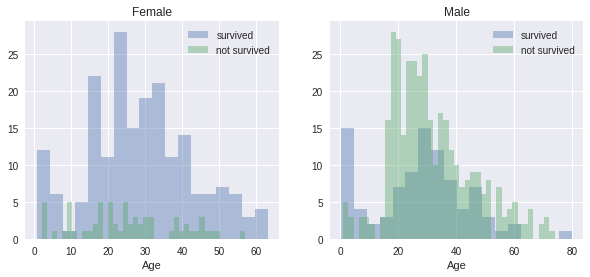

In [ ]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))

women = data[data['Sex']=='female']
men = data[data['Sex']=='male']

ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')

ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

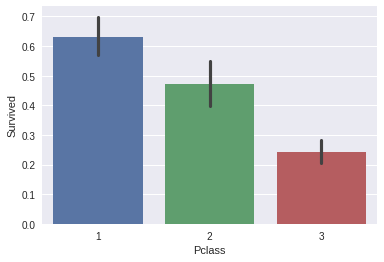

In [ ]:
sns.barplot(x='Pclass', y='Survived', data=data)

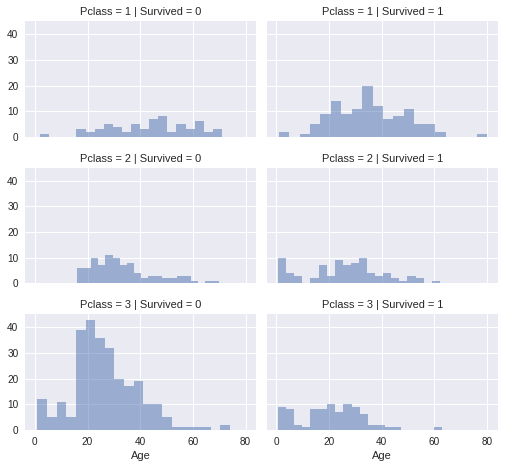

In [ ]:
grid = sns.FacetGrid(data, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

## Basic Data Cleaning

We've missing values in Age, Embarked and Cabin features. Let's count them.

In [ ]:
pd.isnull(data).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
data[data['Embarked'].isnull()]

PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61   female  38.0      0      0  113572  80.0   B28      NaN  
829  female  62.0      0      0  113572  80.0   B28      NaN

One possible strategy is to impute, but we don't really know if that will work, so I decide to drop those missing values, since they're only two.

I'm also getting rid of `Cabin` and `Ticket` since they are noise at this moment.

In [ ]:
#Alternatively, I'd like to extract deck information from Cabin and then delete but that would give me 687 missing values regardless
data.drop(labels=['Cabin', 'Ticket'], axis=1, inplace=True)
data = data[data.Embarked.notna()].copy(deep=True)
pd.isnull(data).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

### Age NULLs

We've a problem with that column... so what can we do? Count them, first.

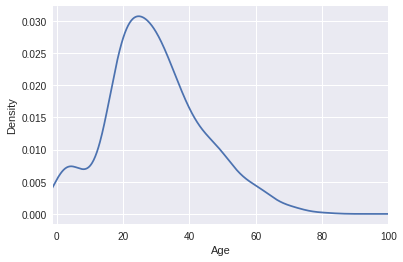

In [ ]:
data.Age.plot.density()
plt.xlim(-1, 100); plt.xlabel("Age")
plt.show()

## Imputation 

Let's work on `Age`. We should build a powerful predictor that will help us to assign the missing values for Age column, but since we're starting with ML, let's simply use the median of the age (per gender) to fill them.

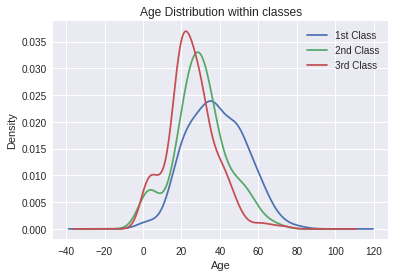

In [ ]:
data.Age[data.Pclass == 1].plot(kind='kde')    
data.Age[data.Pclass == 2].plot(kind='kde')
data.Age[data.Pclass == 3].plot(kind='kde')

plt.xlabel("Age")    
plt.title("Age Distribution within classes")
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') ;

In [ ]:
#I'm also going to consider median age according to Pclass in addition to Sex; (assumption: wealthier are older and Pclass will be different)
med_age_males_1 = data[(data.Age.notnull()) & (data.Sex == "male") & (data.Pclass == 1)]['Age'].median()
med_age_males_2 = data[(data.Age.notnull()) & (data.Sex == "male") & (data.Pclass == 2)]['Age'].median()
med_age_males_3 = data[(data.Age.notnull()) & (data.Sex == "male") & (data.Pclass == 3)]['Age'].median()

med_age_females_1 = data[(data.Age.notnull()) & (data.Sex == "female") & (data.Pclass == 1)]['Age'].median()
med_age_females_2 = data[(data.Age.notnull()) & (data.Sex == "female") & (data.Pclass == 2)]['Age'].median()
med_age_females_3 = data[(data.Age.notnull()) & (data.Sex == "female") & (data.Pclass == 3)]['Age'].median()

data.loc[(data.Age.isnull()) & (data.Sex == "male") & (data.Pclass == 1), 'Age'] = med_age_males_1
data.loc[(data.Age.isnull()) & (data.Sex == "male") & (data.Pclass == 2), 'Age'] = med_age_males_2
data.loc[(data.Age.isnull()) & (data.Sex == "male") & (data.Pclass == 3), 'Age'] = med_age_males_3

data.loc[(data.Age.isnull()) & (data.Sex == "female") & (data.Pclass == 1), 'Age'] = med_age_females_1
data.loc[(data.Age.isnull()) & (data.Sex == "female") & (data.Pclass == 2), 'Age'] = med_age_females_2
data.loc[(data.Age.isnull()) & (data.Sex == "female") & (data.Pclass == 3), 'Age'] = med_age_females_3

Let's see how `Age` looks like now, using a density plot (`data.plot.density`)

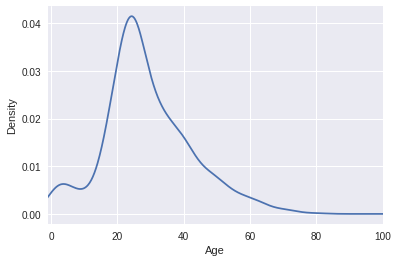

In [ ]:
data.Age.plot.density()
plt.xlim(-1, 100); plt.xlabel("Age")
plt.show()

## EDA - Relationships between variables.

What is the relation between Fare and Age for those who survived and those who didn't.

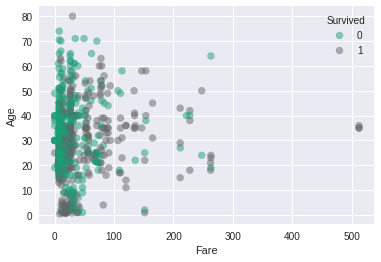

In [ ]:
plt.figure(figsize=(6, 4))
fare_names = [str(data.Survived.unique()[i]) for i in data.Survived.unique()]
scatter = plt.scatter(data['Fare'], data['Age'], 
    c=data['Survived'],
    alpha=0.5, cmap='Dark2')
plt.legend(handles=scatter.legend_elements()[0], labels=fare_names, title="Survived")
plt.xlabel("Fare"); plt.ylabel("Age")
plt.show();

Plotting with the different classes (`Pclass`) values, so we get an idea of how many people survived from 1st, 2nd and 3rd class.

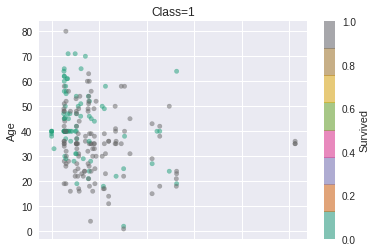

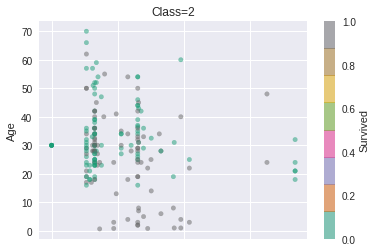

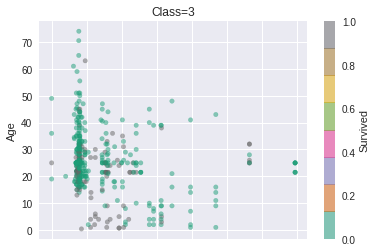

In [ ]:
data[data['Pclass']==1].plot.scatter(x="Fare", y="Age", c="Survived", colormap="Dark2", alpha=0.5, title="Class=1")
data[data['Pclass']==2].plot.scatter(x="Fare", y="Age", c="Survived", colormap="Dark2", alpha=0.5, title="Class=2")
data[data['Pclass']==3].plot.scatter(x="Fare", y="Age", c="Survived", colormap="Dark2", alpha=0.5, title="Class=3");

Fare and Age, for the different genders.

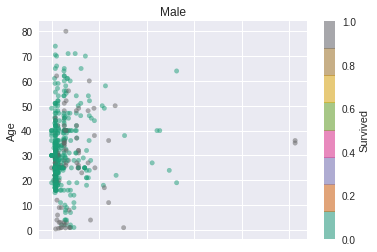

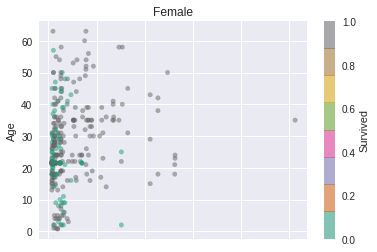

In [ ]:
data[data['Sex']=='male'].plot.scatter("Fare", "Age", c="Survived", colormap="Dark2", alpha=0.5, title="Male")
data[data['Sex']=='female'].plot.scatter("Fare", "Age", c="Survived", colormap="Dark2", alpha=0.5, title="Female")

How about boxplots to see how the people from the different classes and Ages survived? Maybe this plot is more informative??

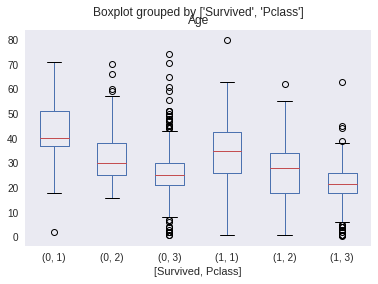

In [ ]:
data.boxplot("Age", by=["Survived", "Pclass"], grid=False)

Histograms of how many people survived, but grouping by gender and class.

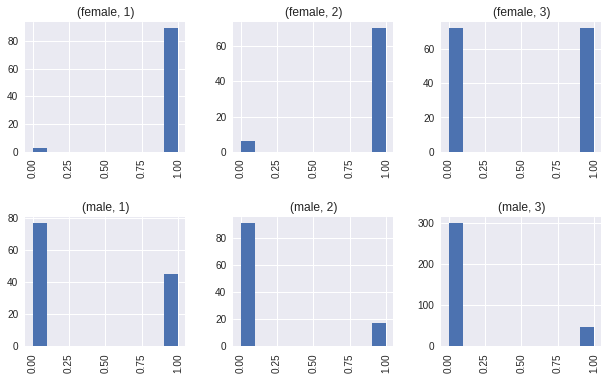

In [ ]:
data.hist("Survived", by=["Sex", "Pclass"], figsize=(10,6), layout=(2, 3)); # sharey=True

What is the age distribution per class?

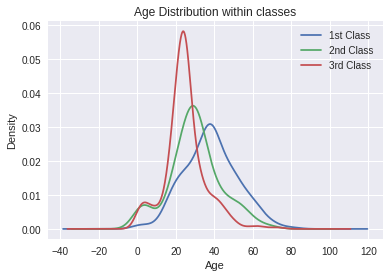

In [ ]:
data.Age[data.Pclass == 1].plot(kind='kde')    
data.Age[data.Pclass == 2].plot(kind='kde')
data.Age[data.Pclass == 3].plot(kind='kde')

plt.xlabel("Age")    
plt.title("Age Distribution within classes")
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') 

## Feature Engineering

**Family size**

Given that the variable `Parch`is the nr of Parents/Children aboard, and `SibSp` is the number of siblings/spouses aboard, we can build a feature that tells us if the passenger has family aboard, and what is its size.

In [ ]:
data["FamilyMembers"] = data["SibSp"] + data["Parch"]+1
print(data["FamilyMembers"].value_counts())

1     535
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilyMembers, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


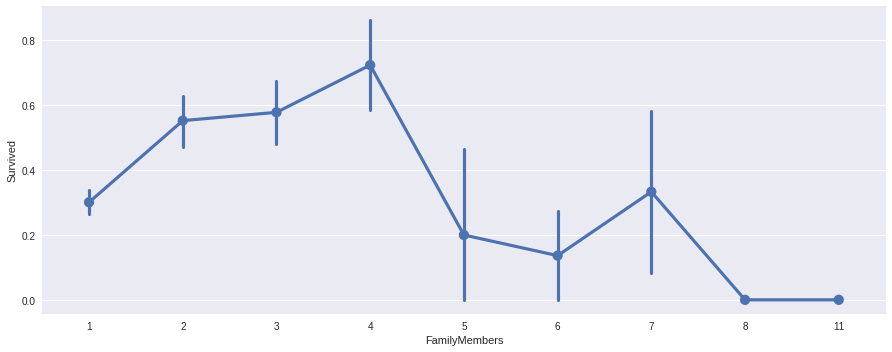

In [ ]:
axes = sns.factorplot('FamilyMembers','Survived', 
                      data=data, aspect = 2.5)

We can also build a categorical that tell us if someone is alone in the boat, or whether has a normal family size (say <=4) or large one (>4).

In [ ]:
data.loc[data["FamilyMembers"] == 1, "FamSize"] = 'single'
data.loc[(data["FamilyMembers"] > 1) & (data["FamilyMembers"] < 5), "FamSize"] = 'normal'
data.loc[data["FamilyMembers"] >= 5, "FamSize"] = 'large'
data.FamSize.value_counts()

single    535
normal    292
large      62
Name: FamSize, dtype: int64

How many people survived, based on this new criteria of family size?

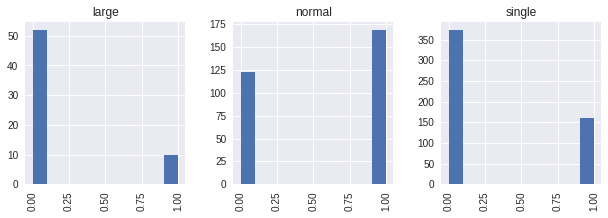

In [ ]:
data.hist("Survived", by="FamSize", figsize=(10,3), layout=(1,3));

### **Convert** categorical into numericals by using OneHotEncoder

In [ ]:
data['male'] = pd.get_dummies(data.Sex, drop_first=True)
data.drop('Sex', axis=1, inplace=True)

In [ ]:
data.head().T

0  \
PassengerId                          1   
Survived                             0   
Pclass                               3   
Name           Braund, Mr. Owen Harris   
Age                               22.0   
SibSp                                1   
Parch                                0   
Fare                              7.25   
Embarked                             S   
FamilyMembers                        2   
FamSize                         normal   
male                                 1   

                                                               1  \
PassengerId                                                    2   
Survived                                                       1   
Pclass                                                         1   
Name           Cumings, Mrs. John Bradley (Florence Briggs Th...   
Age                                                         38.0   
SibSp                                                          1   
Parch                                                          0   
Fare                                                     71.2833   
Embarked                                                       C   
FamilyMembers                                                  2   
FamSize                                                   normal   
male                                                           0   

                                    2  \
PassengerId                         3   
Survived                            1   
Pclass                              3   
Name           Heikkinen, Miss. Laina   
Age                              26.0   
SibSp                               0   
Parch                               0   
Fare                            7.925   
Embarked                            S   
FamilyMembers                       1   
FamSize                        single   
male                                0   

                                                          3  \
PassengerId                                               4   
Survived                                                  1   
Pclass                                                    1   
Name           Futrelle, Mrs. Jacques Heath (Lily May Peel)   
Age                                                    35.0   
SibSp                                                     1   
Parch                                                     0   
Fare                                                   53.1   
Embarked                                                  S   
FamilyMembers                                             2   
FamSize                                              normal   
male                                                      0   

                                      4  
PassengerId                           5  
Survived                              0  
Pclass                                3  
Name           Allen, Mr. William Henry  
Age                                35.0  
SibSp                                 0  
Parch                                 0  
Fare                               8.05  
Embarked                              S  
FamilyMembers                         1  
FamSize                          single  
male                                  1

In [ ]:
newcols = pd.get_dummies(data.FamSize, drop_first=True, prefix="fam") #Doubt: drop_first=True is removing fam_large. Why? 
#Would it be better to have a binary variable called 'alone' if we are not considering size of the family?
data = pd.concat([data, newcols], axis=1)
data.drop(['FamSize','SibSp','Parch'], axis=1, inplace=True)

In [ ]:
data.head().T

0  \
PassengerId                          1   
Survived                             0   
Pclass                               3   
Name           Braund, Mr. Owen Harris   
Age                               22.0   
SibSp                                1   
Parch                                0   
Fare                              7.25   
Embarked                             S   
FamilyMembers                        2   
male                                 1   
fam_normal                           1   
fam_single                           0   

                                                               1  \
PassengerId                                                    2   
Survived                                                       1   
Pclass                                                         1   
Name           Cumings, Mrs. John Bradley (Florence Briggs Th...   
Age                                                         38.0   
SibSp                                                          1   
Parch                                                          0   
Fare                                                     71.2833   
Embarked                                                       C   
FamilyMembers                                                  2   
male                                                           0   
fam_normal                                                     1   
fam_single                                                     0   

                                    2  \
PassengerId                         3   
Survived                            1   
Pclass                              3   
Name           Heikkinen, Miss. Laina   
Age                              26.0   
SibSp                               0   
Parch                               0   
Fare                            7.925   
Embarked                            S   
FamilyMembers                       1   
male                                0   
fam_normal                          0   
fam_single                          1   

                                                          3  \
PassengerId                                               4   
Survived                                                  1   
Pclass                                                    1   
Name           Futrelle, Mrs. Jacques Heath (Lily May Peel)   
Age                                                    35.0   
SibSp                                                     1   
Parch                                                     0   
Fare                                                   53.1   
Embarked                                                  S   
FamilyMembers                                             2   
male                                                      0   
fam_normal                                                1   
fam_single                                                0   

                                      4  
PassengerId                           5  
Survived                              0  
Pclass                                3  
Name           Allen, Mr. William Henry  
Age                                35.0  
SibSp                                 0  
Parch                                 0  
Fare                               8.05  
Embarked                              S  
FamilyMembers                         1  
male                                  1  
fam_normal                            0  
fam_single                            1

In [ ]:
newcols = pd.get_dummies(data.Embarked, drop_first=True, prefix="Port") 
data = pd.concat([data, newcols], axis=1)
data.drop(['Embarked'], axis=1, inplace=True)

In [ ]:
data.head().T

0  \
PassengerId                          1   
Survived                             0   
Pclass                               3   
Name           Braund, Mr. Owen Harris   
Age                               22.0   
SibSp                                1   
Parch                                0   
Fare                              7.25   
FamilyMembers                        2   
male                                 1   
fam_normal                           1   
fam_single                           0   
Port_Q                               0   
Port_S                               1   

                                                               1  \
PassengerId                                                    2   
Survived                                                       1   
Pclass                                                         1   
Name           Cumings, Mrs. John Bradley (Florence Briggs Th...   
Age                                                         38.0   
SibSp                                                          1   
Parch                                                          0   
Fare                                                     71.2833   
FamilyMembers                                                  2   
male                                                           0   
fam_normal                                                     1   
fam_single                                                     0   
Port_Q                                                         0   
Port_S                                                         0   

                                    2  \
PassengerId                         3   
Survived                            1   
Pclass                              3   
Name           Heikkinen, Miss. Laina   
Age                              26.0   
SibSp                               0   
Parch                               0   
Fare                            7.925   
FamilyMembers                       1   
male                                0   
fam_normal                          0   
fam_single                          1   
Port_Q                              0   
Port_S                              1   

                                                          3  \
PassengerId                                               4   
Survived                                                  1   
Pclass                                                    1   
Name           Futrelle, Mrs. Jacques Heath (Lily May Peel)   
Age                                                    35.0   
SibSp                                                     1   
Parch                                                     0   
Fare                                                   53.1   
FamilyMembers                                             2   
male                                                      0   
fam_normal                                                1   
fam_single                                                0   
Port_Q                                                    0   
Port_S                                                    1   

                                      4  
PassengerId                           5  
Survived                              0  
Pclass                                3  
Name           Allen, Mr. William Henry  
Age                                35.0  
SibSp                                 0  
Parch                                 0  
Fare                               8.05  
FamilyMembers                         1  
male                                  1  
fam_normal                            0  
fam_single                            1  
Port_Q                                0  
Port_S                                1

## Baseline

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


features = ["Pclass", "male", "Age", "Fare", "Port_Q", "Port_S"]
target = "Survived"

X_train = data[features]
y_train = data[target]
X_training, X_valid, y_training, y_valid = train_test_split(
    X_train, y_train, test_size=0.2, random_state=4321)

In [ ]:
#Linear Regression
linreg = LinearRegression()
linreg.fit(X_training, y_training)
predictions = np.array(linreg.predict(X_valid))
predictions[predictions > .5] = 1
predictions[predictions <=.5] = 0
accuracy = accuracy_score(y_valid, predictions)
accuracy

0.797752808988764

In [ ]:
#Logistic Regression
logreg_clf = LogisticRegression()
logreg_clf.fit(X_training, y_training)
pred_logreg = logreg_clf.predict(X_valid)
acc_logreg = accuracy_score(y_valid, pred_logreg)

print(acc_logreg)

0.7921348314606742


## Model Construction and Evaluation

Ensuring reproducibility

In [ ]:
np.random.seed(1234)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
features = ["Pclass", "male", "Age", "Fare", "Port_Q", "Port_S",
            "fam_single",'fam_normal']
target = "Survived"

X_train = data[features]
y_train = data[target]
X_training, X_valid, y_training, y_valid = train_test_split(
    X_train, y_train, test_size=0.2)

Linear Regression

In [ ]:
linreg = LinearRegression()
linreg.fit(X_training, y_training)
predictions = np.array(linreg.predict(X_valid))
predictions[predictions > .5] = 1
predictions[predictions <=.5] = 0
accuracy = accuracy_score(y_valid, predictions)
accuracy

0.7921348314606742

Logistic Regression

In [ ]:
logreg_clf = LogisticRegression()
logreg_clf.fit(X_training, y_training)
pred_logreg = logreg_clf.predict(X_valid)
acc_logreg = accuracy_score(y_valid, pred_logreg)

print(acc_logreg)

0.8089887640449438
